# Introduction

This tutorial illustrates how to use *ObjTables* to define a schema for modeling data, as well as how to visualize schemas. The tutorial uses an address book as an example.

# Ceate subclasses of `obj_tables.Model` to represent companies, their employees, and their addresses

First, use `obj_tables.Model` and subclasses of `obj_tables.Attribute` to create classes to represent companies, their employees, and their addresses.

##### Import `obj_tables`

In [1]:
import obj_tables

##### Create a class `Address` to represent the address of companies and their employees

First, define attributes to represent the street, city, state, zip code, and country of an address.

Next, use `obj_tables.Model.Meta` to control how adresses are encoded into and decoded from tables.
* Use `table_format = obj_tables.TableFormat.multiple_cells` to indicate that addresses should be embedded into and extracted out of tables for companies and people.
* Use `attribute_order` to control the order in which the attributes are encoded into colums of tables.
* Use `verbose_name` and `verbose_name_plural` to control how address are labeled when embedded into other tables (heading above the address columns).

In [2]:
class Address(obj_tables.Model):
    street = obj_tables.StringAttribute(unique=True, primary=True, verbose_name='Street')
    city = obj_tables.StringAttribute(verbose_name='City')
    state = obj_tables.StringAttribute(verbose_name='State')
    zip_code = obj_tables.StringAttribute(verbose_name='Zip code')
    country = obj_tables.StringAttribute(verbose_name='Country')

    class Meta(obj_tables.Model.Meta):
        table_format = obj_tables.TableFormat.multiple_cells
        attribute_order = ('street', 'city', 'state', 'zip_code', 'country',)
        verbose_name = 'Address'
        verbose_name_plural = 'Addresses'

##### Create a class `Company` to represent companies

Next, create a class to represent companies.
* Use `unique=True` to indicate each company must have a unique name.
* Use `primary=True` to indicate that company names can be used as a foreign key to encode relationships to companies into cells of tables.
* Use `obj_tables.OneToOneAttribute` to indicate that each company can have an address.

In [3]:
class Company(obj_tables.Model):
    name = obj_tables.StringAttribute(unique=True, primary=True, verbose_name='Name')
    url = obj_tables.UrlAttribute(verbose_name='URL')
    address = obj_tables.OneToOneAttribute(Address, related_name='company', verbose_name='Address')

    class Meta(obj_tables.Model.Meta):
        table_format = obj_tables.TableFormat.column
        attribute_order = ('name', 'url', 'address',)
        verbose_name = 'Company'
        verbose_name_plural = 'Companies'

##### Create a class `Person` to represent people

Next, create a class to represent people.
* Use `enum.Enum` and `obj_tables.EnumAttribute` to capture types of people.
* Use `obj_tables.ManyToOneAttribute` to indicate that each person can be employed by a company and have an address.

In [4]:
import enum


class PersonType(str, enum.Enum):
    family = 'family'
    friend = 'friend'
    business = 'business'


class Person(obj_tables.Model):
    name = obj_tables.StringAttribute(unique=True, primary=True, verbose_name='Name')
    type = obj_tables.EnumAttribute(PersonType, verbose_name='Type')
    company = obj_tables.ManyToOneAttribute(Company, related_name='employees', verbose_name='Company')
    email_address = obj_tables.EmailAttribute(verbose_name='Email address')
    phone_number = obj_tables.StringAttribute(verbose_name='Phone number')
    address = obj_tables.ManyToOneAttribute(Address, related_name='people', verbose_name='Address')

    class Meta(obj_tables.Model.Meta):
        table_format = obj_tables.TableFormat.row
        attribute_order = ('name', 'type', 'company', 'email_address', 'phone_number', 'address',)
        verbose_name = 'Person'
        verbose_name_plural = 'People'

##### Using additional types of attributes

*ObjTables* supports a wide range of attributes in addition to those illustrated here. This includes attributes that can represent mathematical expressions, NumPy arrays, Pandas DataFrames, chemical structures, and biological sequences.

* Strings
  * `obj_tables.StringAttribute`: attribute for strings
  * `obj_tables.LongStringAttribute`: attribute for long strings; provided for compatibility with relational databases
  * `obj_tables.RegexAttribute`: attribute for strings which must match a regular expression
* Enumerations
  * `obj_tables.EnumAttribute`: attribute for enumerations (subclasses of `enum.Enum`)
* Numbers
  * `obj_tables.BooleanAttribute`: attribute for Boolean values
  * `obj_tables.IntegerAttribute`: attribute for integers
  * `obj_tables.PositiveIntegerAttribute`: attribute for positive integers
  * `obj_tables.FloatAttribute`: attribute for floats
  * `obj_tables.PositiveAttribute`: attribute for positive floats
* Internet addresses
  * `obj_tables.LocalPathAttribute`: attribute for paths to local files and directories
  * `obj_tables.UrlAttribute`: attribute for URLs
  * `obj_tables.EmailAttribute`: attribute for email addresses
* Dates and times
  * `obj_tables.DateAttribute`: attribute for dates (`datetime.date`)
  * `obj_tables.TimeAttribute`: attribute for times (`datetime.time`)
  * `obj_tables.DateTimeAttribute`: attribute for date and times (`datetime.datetime`)
* Mathematics (`obj_tables.math`): attributes for NumPy arrays, Pandas DataFrames, and symbolic expressions
* Science (`obj_tables.sci`): attributes units, quantities, uncertainties, ontology terms, digital object identifiers, PubMed identifiers, and other identifiers
* Chemistry (`obj_tables.chem`): attributes for chemical structures and formulas
* Biology (`obj_table.bio`): attributes for DNA, RNA, and protein sequences, sequence features, and position-specific weight matrices
* Relationships
  * `obj_tables.OneToOneAttribute`: attribute for a one-to-one relationship to another object
  * `obj_tables.OneToManyAttribute`: attribute for a one-to-many relationship to multiple other objects
  * `obj_tables.ManyToOneAttribute`: attribute for a many-to-one relationship to another object
  * `obj_tables.ManyToManyAttribute`: attribute for a many-to-many relationship to multiple other objects

See https://objtables.org for more information.

##### Customizing the validation of each attribute

Most attributes support optional arguments which can be used to define constraints on their values. For example,

* `obj_tables.StringAttribute`: supports two optional arguments, `min_length` and `max_length` which can be used to define the minimum and maximum valid string lengths.
* `obj_tables.RegexAttribute`: supports one optional argument, `pattern` which can be used to define a regular expression that each value must match.
* `obj_tables.IntegerAttribute`: supports two optional arguments, `min` and `max` which can be used to define the minimum and maximum valid values.
* `obj_tables.FloatAttribute`: supports two optional arguments, `min` and `max` which can be used to define the minimum and maximum valid values.

See https://objtables.org for more information.

##### Add the classes to a module

In [5]:
import types
schema = type('address_book', (types.ModuleType, ), {
    'Address': Address,
    'Company': Company,
    'Person': Person,
    'PersonType': PersonType,
})

# Visualize the schema as a UML diagram

Second, use `obj_tables.utils.viz_schema` to visualize the schema for address books.

##### Create a temporary file for the UML diagram of the schema

In [6]:
import os
dir = 'Address book'
if not os.path.isdir(dir):
    os.makedirs(dir)
filename = os.path.join(dir, 'Address book.png')

##### Generate a UML diagram of the schema

In [7]:
from obj_tables.utils import viz_schema
viz_schema(schema, filename)

##### Display the UML diagram

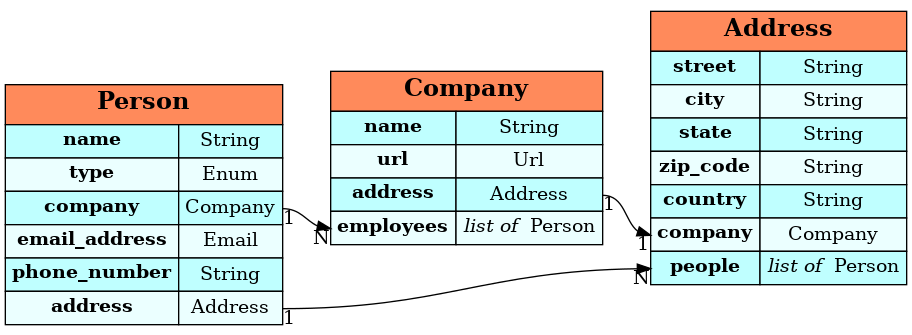

In [8]:
from IPython.display import Image
Image(filename=filename)